In [5]:
import pandas as pd

ogden = "Ogden_Data.csv"
provo = "Provo_Data.csv"
slc = "SLC_All_Param.csv"
ogden_df = pd.read_csv(ogden)
provo_df = pd.read_csv(provo)
slc_df = pd.read_csv(slc)

In [26]:
ogden_df['datetime (UTC)'] = pd.to_datetime(ogden_df['datetime (UTC)'])
ogden_df[['latitude', 'longitude']] = ogden_df['coordinates (lat,lon)'].str.extract(r'\(([^,]+), ([^)]+)\)').astype(float)

provo_df['datetime (UTC)'] = pd.to_datetime(provo_df['datetime (UTC)'])
provo_df[['latitude', 'longitude']] = provo_df['coordinates (lat,lon)'].str.extract(r'\(([^,]+), ([^)]+)\)').astype(float)

slc_df['datetime (UTC)'] = pd.to_datetime(slc_df['datetime (UTC)'])
slc_df[['latitude', 'longitude']] = slc_df['coordinates (lat,lon)'].str.extract(r'\(([^,]+), ([^)]+)\)').astype(float)

ogden_df_encoded = pd.get_dummies(ogden_df, columns=['model (name)'])
provo_df_encoded = pd.get_dummies(provo_df, columns=['model (name)'])
slc_df_encoded = pd.get_dummies(slc_df, columns=['model (name)'])

ogden_df_encoded['hour'] = ogden_df_encoded['datetime (UTC)'].dt.hour
ogden_df_encoded['day'] = ogden_df_encoded['datetime (UTC)'].dt.day
ogden_df_encoded['month'] = ogden_df_encoded['datetime (UTC)'].dt.month
ogden_df_encoded['year'] = ogden_df_encoded['datetime (UTC)'].dt.year

provo_df_encoded['hour'] = provo_df_encoded['datetime (UTC)'].dt.hour
provo_df_encoded['day'] = provo_df_encoded['datetime (UTC)'].dt.day
provo_df_encoded['month'] = provo_df_encoded['datetime (UTC)'].dt.month
provo_df_encoded['year'] = provo_df_encoded['datetime (UTC)'].dt.year

slc_df_encoded['hour'] = slc_df_encoded['datetime (UTC)'].dt.hour
slc_df_encoded['day'] = slc_df_encoded['datetime (UTC)'].dt.day
slc_df_encoded['month'] = slc_df_encoded['datetime (UTC)'].dt.month
slc_df_encoded['year'] = slc_df_encoded['datetime (UTC)'].dt.year

ogden_df_encoded.drop(['datetime (UTC)', 'coordinates (lat,lon)'], axis=1, inplace=True)
provo_df_encoded.drop(['datetime (UTC)', 'coordinates (lat,lon)'], axis=1, inplace=True)
slc_df_encoded.drop(['datetime (UTC)', 'coordinates (lat,lon)'], axis=1, inplace=True)

,model elevation (surface),utc_offset (hrs),temperature (degC),relative_humidity (0-1),total_cloud_cover (0-1),total_precipitation (mm of water equivalent),snowfall (mm of water equivalent),snow_depth (mm of water equivalent),latitude,longitude,model (name)_era5,hour,day,month,year
0,1604.59,-7.0,5.10,0.63,0.36,0.03,0.02,38.52,41.223005,-111.973843,True,0,31,3,2004
1,1604.59,-7.0,9.19,0.57,0.53,0.09,0.01,1.15,41.223005,-111.973843,True,0,30,4,2004
2,1604.59,-7.0,13.56,0.46,0.43,0.06,0.00,0.06,41.223005,-111.973843,True,0,31,5,2004
3,1604.59,-7.0,19.27,0.42,0.39,0.02,0.00,0.00,41.223005,-111.973843,True,0,30,6,2004
4,1604.59,-7.0,23.66,0.37,0.29,0.01,0.00,0.00,41.223005,-111.973843,True,0,31,7,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,1604.59,-7.0,3.38,0.65,0.52,0.05,0.01,1.76,41.223005,-111.973843,True,0,30,11,2023
237,1604.59,-7.0,-1.69,0.79,0.54,0.07,0.06,32.65,41.223005,-111.973843,True,0,31,12,2023
238,1604.59,-7.0,-1.52,0.81,0.68,0.12,0.11,42.77,41.223005,-111.973843,True,0,31,1,2024
239,1604.59,-7.0,0.68,0.75,0.56,0.14,0.08,45.17,41.223005,-111.973843,True,0,29,2,2024


In [28]:
# Select features and target variable
features = ['temperature (degC)', 'relative_humidity (0-1)', 'total_precipitation (mm of water equivalent)', 'total_cloud_cover (0-1)']
target_variable = 'snowfall (mm of water equivalent)'

ogden_data = ogden_df_encoded[['month', 'year', target_variable] + features].copy()
provo_data = provo_df_encoded[['month', 'year', target_variable] + features].copy()
slc_data = slc_df_encoded[['month', 'hour', 'year', target_variable] + features].copy()

In [67]:
ogden_filtered_data = ogden_data[ogden_data['month'] == 2]
provo_filtered_data = provo_data[provo_data['month'] == 2]
slc_filtered_data = slc_data[(slc_data['hour'] == 10) & (slc_data['month'] == 2)]

slc_yearly_mean = slc_filtered_data.groupby('year').mean()

slc_yearly_mean = slc_yearly_mean.reset_index()

In [69]:
import statsmodels.api as sm

ogden_x = ogden_filtered_data['year']
ogden_y = ogden_filtered_data['snowfall (mm of water equivalent)']
ogden_result = sm.OLS(ogden_y, ogden_x).fit()

provo_x = provo_filtered_data['year']
provo_y = provo_filtered_data['snowfall (mm of water equivalent)']
provo_result = sm.OLS(provo_y, provo_x).fit()

slc_x = slc_yearly_mean['year']
slc_y = slc_yearly_mean['snowfall (mm of water equivalent)']
slc_result = sm.OLS(slc_y, slc_x).fit()

print("Ogden OLS")
print(ogden_result.summary())
print("Provo OLS")
print(provo_result.summary())
print("Salt Lake City OLS")
print(slc_result.summary())

Ogden OLS
                                        OLS Regression Results                                        
Dep. Variable:     snowfall (mm of water equivalent)   R-squared (uncentered):                   0.843
Model:                                           OLS   Adj. R-squared (uncentered):              0.835
Method:                                Least Squares   F-statistic:                              102.4
Date:                               Wed, 03 Apr 2024   Prob (F-statistic):                    4.35e-09
Time:                                       22:40:33   Log-Likelihood:                          47.021
No. Observations:                                 20   AIC:                                     -92.04
Df Residuals:                                     19   BIC:                                     -91.05
Df Model:                                          1                                                  
Covariance Type:                           nonrobust           

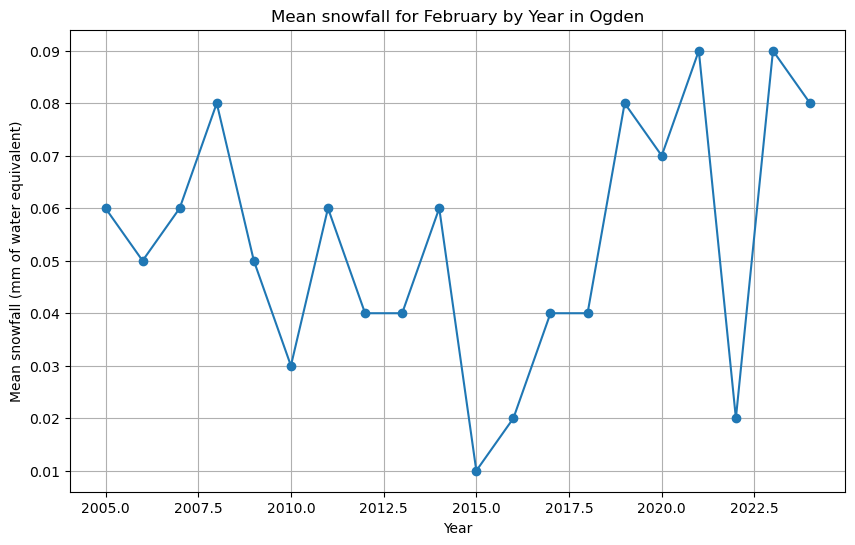

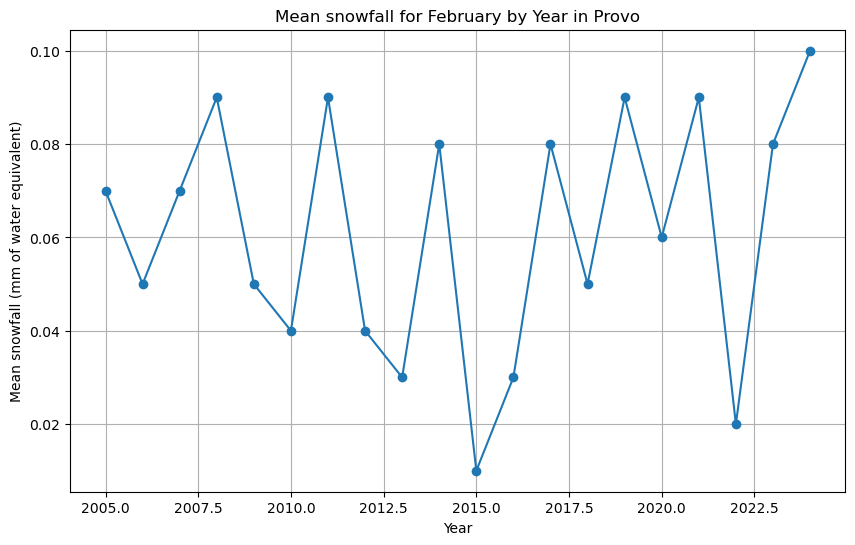

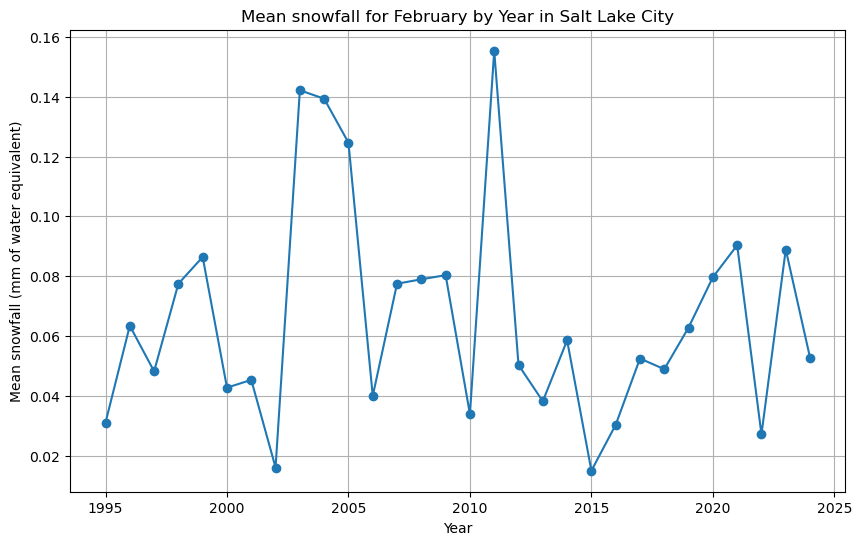

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(ogden_x, ogden_y, marker='o')

plt.title('Mean snowfall for February by Year in Ogden')
plt.xlabel('Year')
plt.ylabel('Mean snowfall (mm of water equivalent)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(provo_x, provo_y, marker='o')

plt.title('Mean snowfall for February by Year in Provo')
plt.xlabel('Year')
plt.ylabel('Mean snowfall (mm of water equivalent)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(slc_x, slc_y, marker='o')

plt.title('Mean snowfall for February by Year in Salt Lake City')
plt.xlabel('Year')
plt.ylabel('Mean snowfall (mm of water equivalent)')
plt.grid(True)
plt.show()